# Name      :   Yohan Abeysinghe
# Index No  :   190014F

All the imports are done at the beginning. 

In [1]:
import sympy
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image 

(1). Carry out gamma correction on the image show in Fig. 1 with γ ∈ [0.2,0.8,1.2,2]

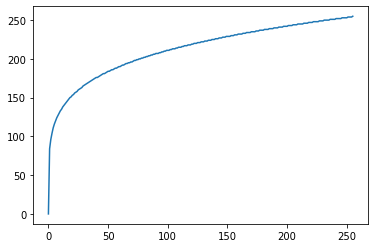

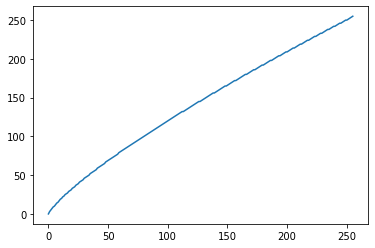

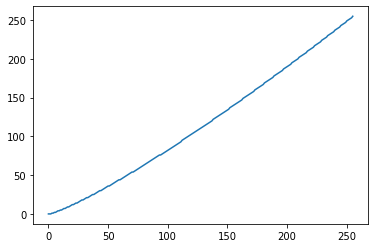

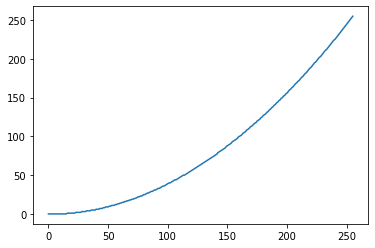

In [2]:
im = cv.imread(r'spider.png')
assert im is not None

gamma = [0.2, 0.8, 1.2, 2]
for i in gamma:
    t = np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
    g = cv.LUT(im,t)    # equivalent to g = t[f]

    fig, ax = plt.subplots()
    ax.plot(t)

    cv.namedWindow('image', cv.WINDOW_AUTOSIZE)
    cv.imshow('image', im)
    cv.waitKey(0)

    cv.imshow('gamma corrected', g)
    cv.waitKey(0)

    cv.destroyAllWindows()

Gamma corrected output with gamma values 0.2, 0.8, 1.2 and 2 are show belove respectively. A markdown cell is used to manually enter the output image in this part. Matplotlib inline is used in the later part of the exercies.

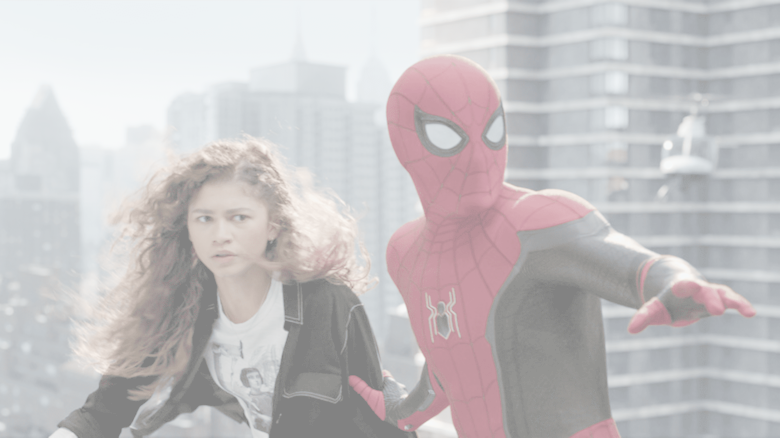

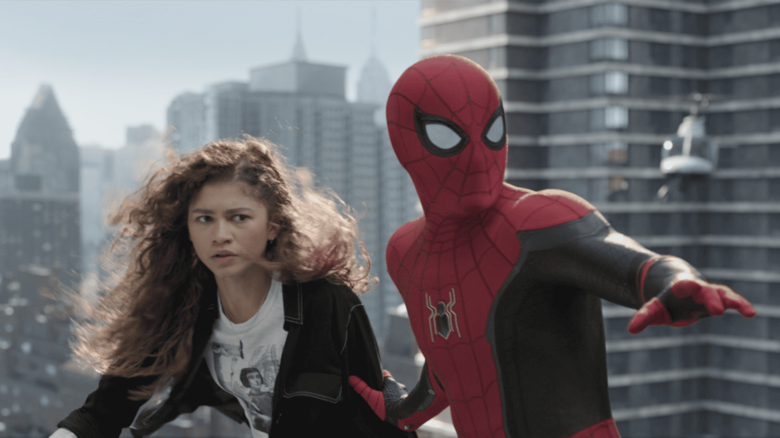

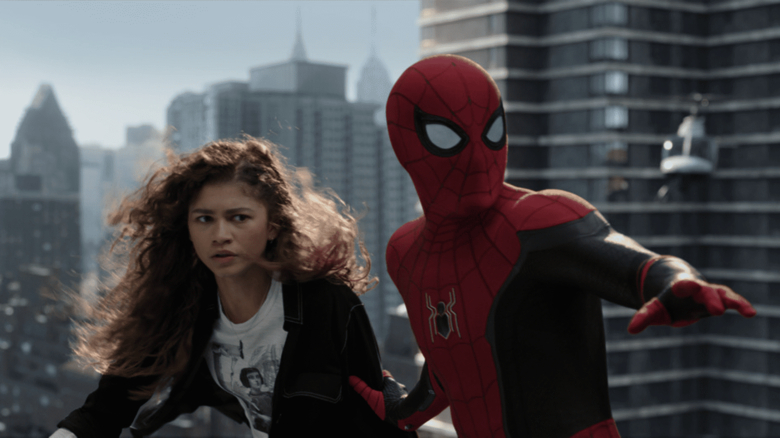

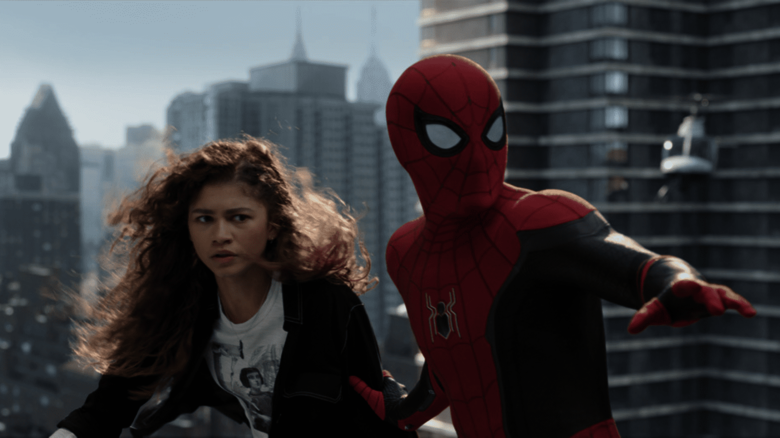

(2). Implement the intensity transformation in Fig. 2 on the image shown in Fig. 1

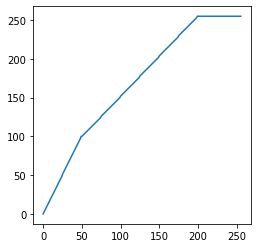

In [3]:
im = cv.imread(r'spider.png')
assert im is not None

t1 = np.linspace(0, 100, 50)
t2 = np.linspace(100, 255, 150)
t3 = np.linspace(255, 255, 56)

t = np.concatenate((t1,t2,t3), axis=0).astype(np.uint8)

fig, ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

g = cv.LUT(im,t)    # This operation works collectively on all 3 colors.

cv.namedWindow('image', cv.WINDOW_AUTOSIZE)
cv.imshow('image', im)
cv.waitKey(0)

cv.imshow('custom intensity trasformation', g)
cv.waitKey(0)

cv.destroyAllWindows()

The resulted trasformed image is shown belove. 

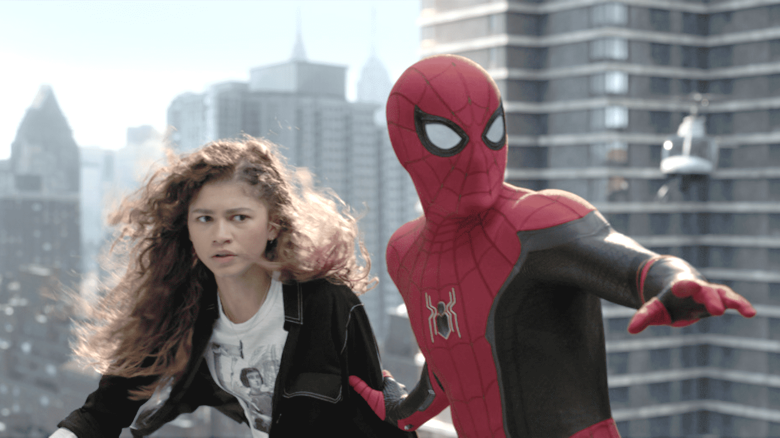

(3). Fig. 3 shows a somewhat dark image.

3(a) Show the histogram of the original image.
3(b) Histogram equalize the image.
3(c) Show the histogram of the equalized image.

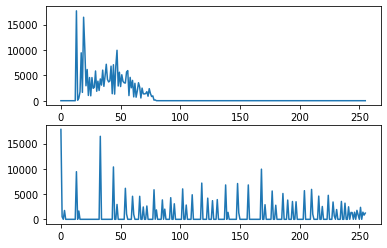

In [4]:
im = cv.imread(r'shells.tif', cv.IMREAD_GRAYSCALE)
assert im is not None

hist = cv.calcHist([im], [0], None, [256], [0,256])
equal = cv.equalizeHist(im)
hist_equal = cv.calcHist([equal], [0], None, [256], [0,256])

fig, ax = plt.subplots(2,1)
ax[0].plot(hist)
ax[1].plot(hist_equal)

cv.namedWindow('image', cv.WINDOW_AUTOSIZE)
cv.imshow('image', im)
cv.waitKey(0)

cv.imshow('equalized image', equal)
cv.waitKey(0)

cv.destroyAllWindows()

Equalized image is shown belove. 

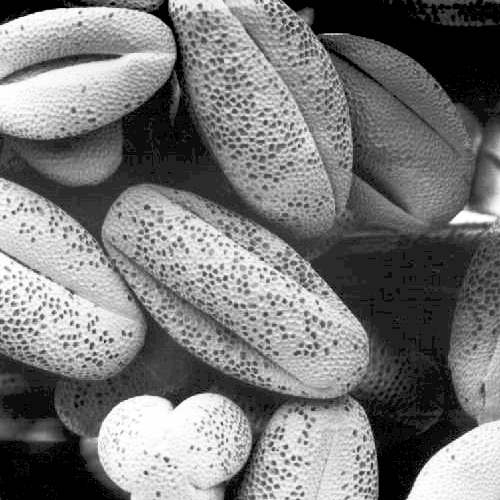

(4). Fig. 41 shows an image probably of the Zion park.

4(a) Enhance the saturation of this image.

In [5]:
im = cv.imread(r'zion_pass.jpg')
assert im is not None

hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV).astype("float32")
(h, s, v) = cv.split(hsv)
s = s*3
s = np.clip(s,0,255)
sat_hsv = cv.merge([h,s,v])

sat = cv.cvtColor(sat_hsv.astype("uint8"), cv.COLOR_HSV2BGR)

cv.namedWindow('image', cv.WINDOW_AUTOSIZE)
cv.imshow('image', im)
cv.waitKey(0)

cv.imshow('image', sat)
cv.waitKey(0)

cv.destroyAllWindows()

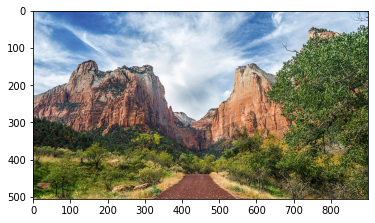

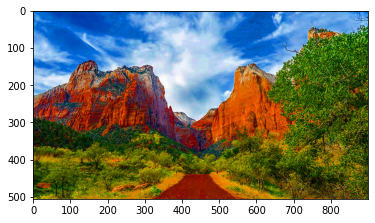

In [6]:
im = cv.imread(r'zion_pass.jpg')
assert im is not None

hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV).astype("float32")
(h, s, v) = cv.split(hsv)
s = s*3
s = np.clip(s,0,255)
sat_hsv = cv.merge([h,s,v])

sat_bgr = cv.cvtColor(sat_hsv.astype("uint8"), cv.COLOR_HSV2BGR)

plt.figure()
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(im) 
plt.show()

plt.figure()
sat_rgb = cv.cvtColor(sat_bgr, cv.COLOR_BGR2RGB)
plt.imshow(sat_rgb) 
plt.show()

4(b) Change the hue to your liking.

In [7]:
im = cv.imread(r'zion_pass.jpg')
assert im is not None

hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV).astype("float32")
(h, s, v) = cv.split(hsv)
h = h*3
h = np.clip(h,0,255)
sat_hsv = cv.merge([h,s,v])

sat = cv.cvtColor(sat_hsv.astype("uint8"), cv.COLOR_HSV2BGR)

cv.namedWindow('image', cv.WINDOW_AUTOSIZE)
cv.imshow('image', im)
cv.waitKey(0)

cv.imshow('image', sat)
cv.waitKey(0)

cv.destroyAllWindows()

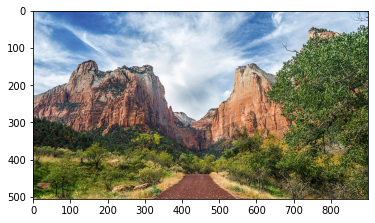

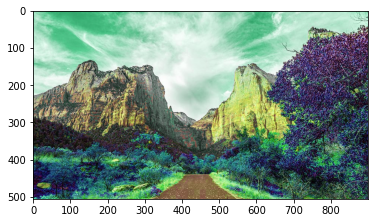

In [8]:
im = cv.imread(r'zion_pass.jpg')
assert im is not None

hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV).astype("float32")
(h, s, v) = cv.split(hsv)
h = h*3
h = np.clip(h,0,255)
hue_hsv = cv.merge([h,s,v])

hue_bgr = cv.cvtColor(hue_hsv.astype("uint8"), cv.COLOR_HSV2BGR)

plt.figure()
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(im) 
plt.show()

plt.figure()
hue_rgb = cv.cvtColor(hue_bgr, cv.COLOR_BGR2RGB)
plt.imshow(hue_rgb) 
plt.show()